In [115]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


# 1-Dataset

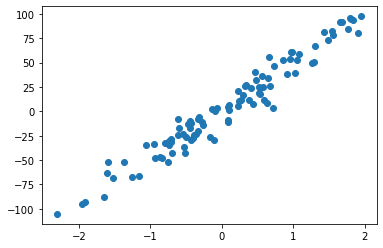

In [116]:
x,y = make_regression(n_samples=100, n_features=1,noise=10)
plt.scatter(x,y) 


In [117]:
print(x.shape)
y = y.reshape(y.shape[0 ],1)
print(y.shape)

(100, 1)
(100, 1)


In [118]:
 #matrice X
X = np.hstack((x,np.ones(x.shape))) #collez deux vecteur 
X

array([[ 0.53516535,  1.        ],
       [ 0.2387653 ,  1.        ],
       [ 0.30155815,  1.        ],
       [-0.33568269,  1.        ],
       [ 1.9090109 ,  1.        ],
       [-0.83824036,  1.        ],
       [-0.7895556 ,  1.        ],
       [ 0.63895901,  1.        ],
       [ 0.64852326,  1.        ],
       [ 0.22411226,  1.        ],
       [-0.59569402,  1.        ],
       [ 0.65526231,  1.        ],
       [ 0.46092628,  1.        ],
       [-1.52588752,  1.        ],
       [ 0.98780852,  1.        ],
       [-0.9341115 ,  1.        ],
       [ 0.53962306,  1.        ],
       [-0.0691863 ,  1.        ],
       [-0.71718243,  1.        ],
       [ 1.07304806,  1.        ],
       [-0.13511475,  1.        ],
       [-1.0605528 ,  1.        ],
       [ 0.47496418,  1.        ],
       [-0.6148033 ,  1.        ],
       [ 0.67608165,  1.        ],
       [ 1.65242362,  1.        ],
       [-0.39855254,  1.        ],
       [ 0.4120335 ,  1.        ],
       [-0.5037732 ,

In [119]:
theta = np.random.randn(2,1)

In [120]:
theta

array([[-0.0555145 ],
       [ 1.30587795]])

# Model

In [121]:
def model(X,theta):
    return X.dot(theta)

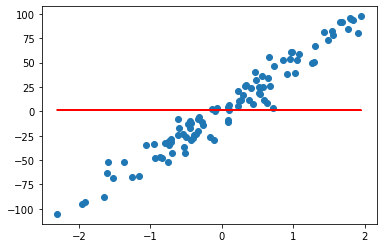

In [122]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

# fonction cout

In [123]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [124]:
cost_function(X,y,theta)

1145.9972914001366

#  Gradients et descente de gradient

In [125]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [126]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range (0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta , cost_history

#Machine Learning 

In [134]:
theta_final , cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)

In [135]:
theta_final

array([[48.13237973],
       [ 1.02403277]])

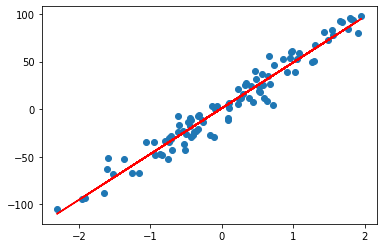

In [136]:
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x, prediction,c='r')

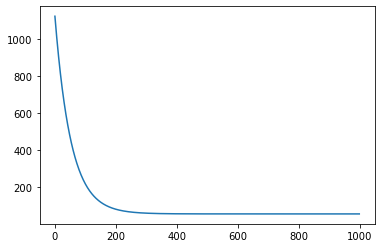

In [137]:
plt.plot(range(1000),cost_history)

# coefficient de determination

In [138]:
#Plus proche de 1 il rentre dans le nuage de points
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y -y.mean())**2).sum()
    return 1-u/v

In [139]:
coef_determination(y,prediction)


0.9516382777749014